In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

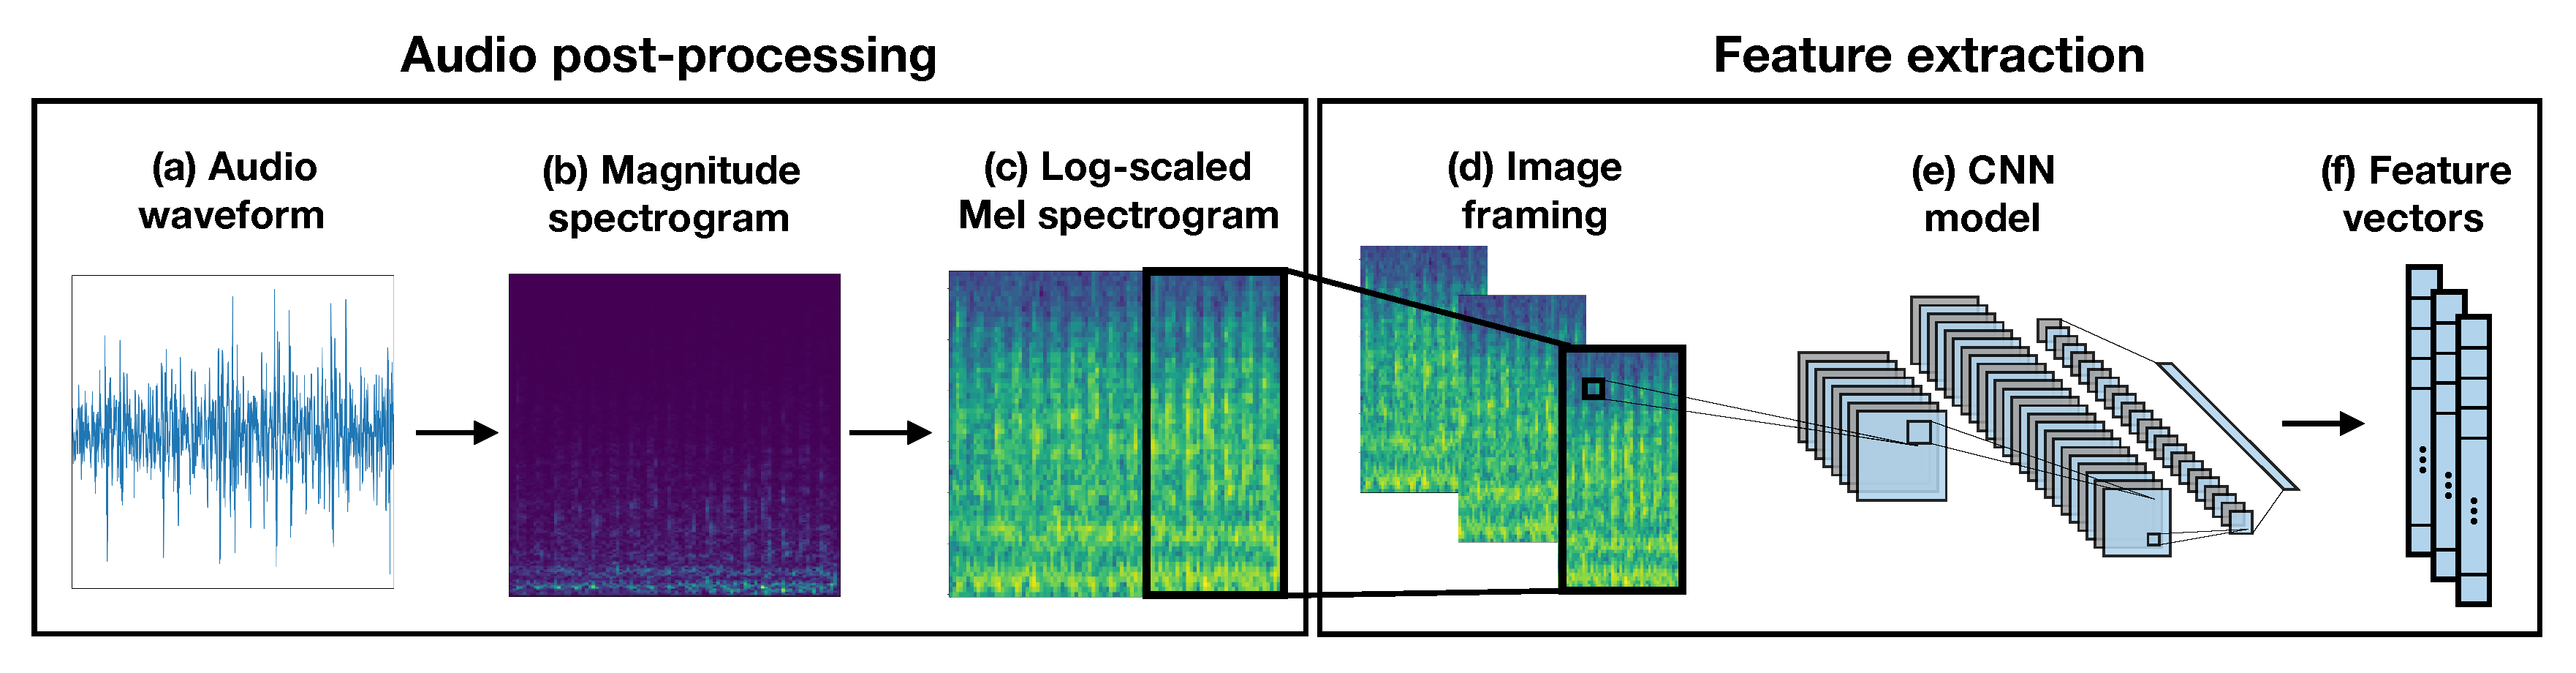

- https://github.com/iver56/audiomentations
- https://github.com/zcaceres/spec_augment

In [2]:
import librosa
x , sr = librosa.load(librosa.util.example_audio_file())
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(1355168,) 22050


In [3]:
# 音频裁剪
x[20 * sr:40 * sr]

array([-0.11339746, -0.11345521, -0.10893712, ...,  0.05663059,
        0.0559087 ,  0.05454752], dtype=float32)

In [4]:
# 音频旋转
x = np.roll(x, sr*10)
print(x.shape, sr)

(1355168,) 22050


In [5]:
# 音频调音
import cv2
x_tune = cv2.resize(x, (1, int(len(x) * 1.2))).squeeze()
lc = len(x_tune) - len(x)
x_tune = x_tune[int(lc / 2):int(lc / 2) + len(x)]

In [6]:
# 音频加噪
wn = np.random.randn(len(x))
x = np.where(x != 0.0, x + 0.02 * wn, 0.0)  # 噪声不要添加到0

In [7]:
from audiomentations import *
import numpy as np

augment = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),
    TimeStretch(min_rate=0.8, max_rate=1.25, p=0.5),
    PitchShift(min_semitones=-4, max_semitones=4, p=0.5),
    Shift(min_fraction=-0.5, max_fraction=0.5, p=0.5),
])

augmented_samples = augment(samples=x, sample_rate=sr)

Populating the interactive namespace from numpy and matplotlib


/home/lyz/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['Normalize']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<AxesSubplot:xlabel='Time'>

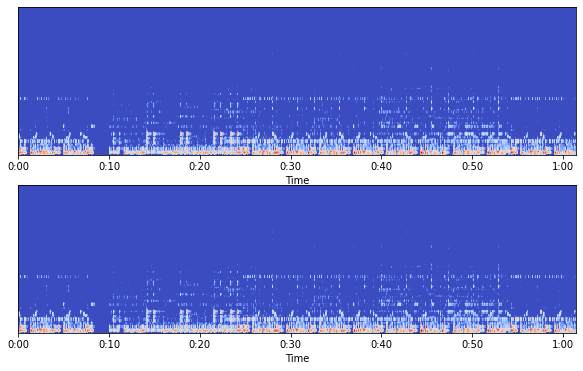

In [8]:
import librosa.display
%pylab inline

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
melspec = librosa.feature.melspectrogram(x, sr, n_fft=1024, hop_length=512, n_mels=128)
logmelspec = librosa.amplitude_to_db(melspec)        # 转换到对数刻度
librosa.display.specshow(logmelspec, sr=sr, x_axis='time')

plt.subplot(2, 1, 2)
melspec = librosa.feature.melspectrogram(augmented_samples, sr, n_fft=1024, hop_length=512, n_mels=128)
logmelspec = librosa.amplitude_to_db(melspec)        # 转换到对数刻度
librosa.display.specshow(logmelspec, sr=sr, x_axis='time')

<AxesSubplot:xlabel='Time'>

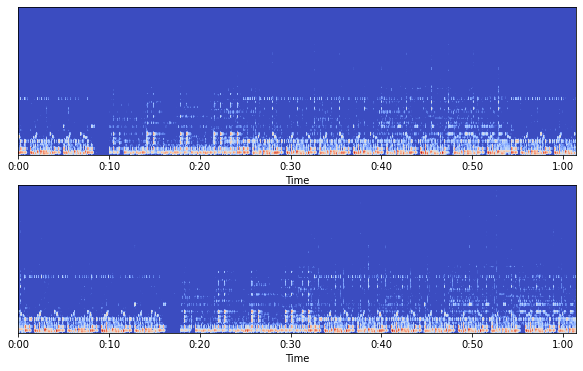

In [9]:
augment = Compose([
    Shift(min_fraction=-1, max_fraction=1, p=1),
])
augmented_samples = augment(samples=x, sample_rate=sr)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
melspec = librosa.feature.melspectrogram(x, sr, n_fft=1024, hop_length=512, n_mels=128)
logmelspec = librosa.amplitude_to_db(melspec)        # 转换到对数刻度
librosa.display.specshow(logmelspec, sr=sr, x_axis='time')

plt.subplot(2, 1, 2)
melspec = librosa.feature.melspectrogram(augmented_samples, sr, n_fft=1024, hop_length=512, n_mels=128)
logmelspec = librosa.amplitude_to_db(melspec)        # 转换到对数刻度
librosa.display.specshow(logmelspec, sr=sr, x_axis='time')

# 数据扩增方法：具体任务相关的
# 音频分类的情况
# 语音识别的情况

<AxesSubplot:xlabel='Time'>

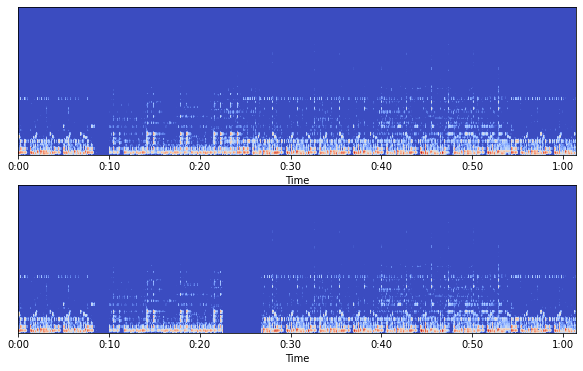

In [10]:
augment = Compose([
    TimeMask(p=1),
])
augmented_samples = augment(samples=x, sample_rate=sr)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
melspec = librosa.feature.melspectrogram(x, sr, n_fft=1024, hop_length=512, n_mels=128)
logmelspec = librosa.amplitude_to_db(melspec)        # 转换到对数刻度
librosa.display.specshow(logmelspec, sr=sr, x_axis='time')

plt.subplot(2, 1, 2)
melspec = librosa.feature.melspectrogram(augmented_samples, sr, n_fft=1024, hop_length=512, n_mels=128)
logmelspec = librosa.amplitude_to_db(melspec)        # 转换到对数刻度
librosa.display.specshow(logmelspec, sr=sr, x_axis='time')

# 这个mask能随便做吗？
# 会考虑具体音频关键信息的，时间，频率

<AxesSubplot:xlabel='Time'>

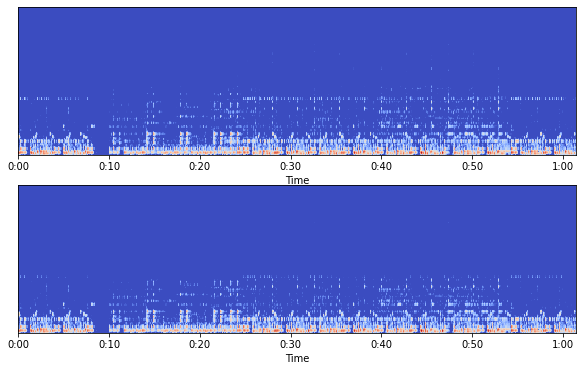

In [14]:
augment = Compose([
    FrequencyMask(p=1),
])
augmented_samples = augment(samples=x, sample_rate=sr)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
melspec = librosa.feature.melspectrogram(x, sr, n_fft=1024, hop_length=512, n_mels=128)
logmelspec = librosa.amplitude_to_db(melspec)        # 转换到对数刻度
librosa.display.specshow(logmelspec, sr=sr, x_axis='time')

plt.subplot(2, 1, 2)
melspec = librosa.feature.melspectrogram(augmented_samples, sr, n_fft=1024, hop_length=512, n_mels=128)
logmelspec = librosa.amplitude_to_db(melspec)        # 转换到对数刻度
librosa.display.specshow(logmelspec, sr=sr, x_axis='time')

<AxesSubplot:xlabel='Time'>

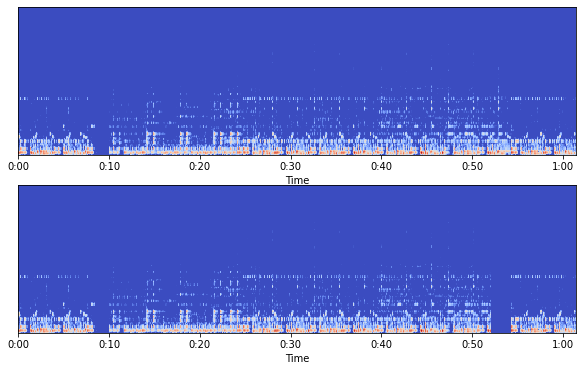

In [15]:
augment = Compose([
    TimeMask(p=1),
    FrequencyMask(p=1),
])
augmented_samples = augment(samples=x, sample_rate=sr)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
melspec = librosa.feature.melspectrogram(x, sr, n_fft=1024, hop_length=512, n_mels=128)
logmelspec = librosa.amplitude_to_db(melspec)        # 转换到对数刻度
librosa.display.specshow(logmelspec, sr=sr, x_axis='time')

plt.subplot(2, 1, 2)
melspec = librosa.feature.melspectrogram(augmented_samples, sr, n_fft=1024, hop_length=512, n_mels=128)
logmelspec = librosa.amplitude_to_db(melspec)        # 转换到对数刻度
librosa.display.specshow(logmelspec, sr=sr, x_axis='time')

<AxesSubplot:xlabel='Time'>

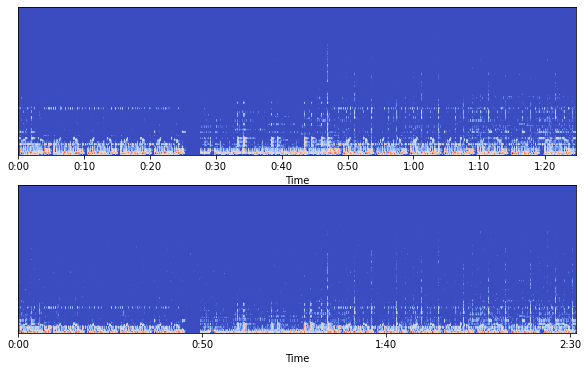

In [48]:
augment = Compose([
    Resample(p=1),
])
augmented_samples = augment(samples=x, sample_rate=sr)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
melspec = librosa.feature.melspectrogram(x, sr, n_fft=1024, hop_length=512, n_mels=128)
logmelspec = librosa.amplitude_to_db(melspec)        # 转换到对数刻度
librosa.display.specshow(logmelspec, sr=sr, x_axis='time')

plt.subplot(2, 1, 2)
melspec = librosa.feature.melspectrogram(augmented_samples, sr, n_fft=1024, hop_length=512, n_mels=128)
logmelspec = librosa.amplitude_to_db(melspec)        # 转换到对数刻度
librosa.display.specshow(logmelspec, sr=sr, x_axis='time')

<AxesSubplot:xlabel='Time'>

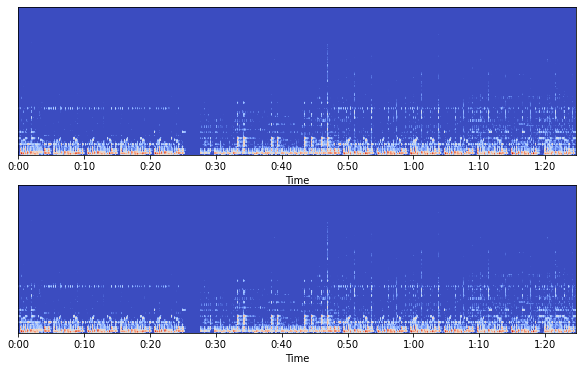

In [51]:
augment = Compose([
    LoudnessNormalization(p=1),
])
augmented_samples = augment(samples=x, sample_rate=sr)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
melspec = librosa.feature.melspectrogram(x, sr, n_fft=1024, hop_length=512, n_mels=128)
logmelspec = librosa.amplitude_to_db(melspec)        # 转换到对数刻度
librosa.display.specshow(logmelspec, sr=sr, x_axis='time')

plt.subplot(2, 1, 2)
melspec = librosa.feature.melspectrogram(augmented_samples, sr, n_fft=1024, hop_length=512, n_mels=128)
logmelspec = librosa.amplitude_to_db(melspec)        # 转换到对数刻度
librosa.display.specshow(logmelspec, sr=sr, x_axis='time')